# 01 - Kanton Zürich Boundary
### Author: Daniel Herrera-Russert
#### February 04, 2025

In [8]:
# !pip install geopandas requests

In [1]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

## 1. Loading the dataset

The [**SwissBOUNDARIES3D**](https://opendata.swiss/en/dataset/swissboundaries3d-kantonsgrenzen) dataset, provided by the **Federal Office of Topography (swisstopo)**, contains high-precision vector geometries of Switzerland’s administrative boundaries. It includes the **national, cantonal, district, and municipal boundaries** in a **three-dimensional (3D) format**, making it suitable for GIS applications, mapping, and spatial analysis. The dataset is updated regularly to reflect administrative changes and is available in various coordinate reference systems (e.g., **LV95 - EPSG:2056** and **WGS84 - EPSG:4326**). Users can access and download the data through **opendata.swiss**, ensuring transparency and accessibility for research, urban planning, and government use.

SwissBOUNDARIES3D works by providing structured boundary data in **vector formats such as Shapefile (SHP), GeoJSON, and GML**, allowing easy integration into **GIS software like QGIS, ArcGIS, and Python-based tools**. The dataset is delivered via web services such as **WMS and WFS**, enabling dynamic access to boundary layers without needing local storage. It supports detailed cartographic representation, including hierarchical levels (e.g., canton vs. municipality) and topological consistency. The dataset plays a crucial role in **spatial analysis, land-use planning, and geospatial decision-making** across Switzerland.

The following script **downloads, processes, and visualizes** the **Canton of Zürich's boundary** from an official **Swiss WMS/WFS service**. It first sends a **GET request** to the **geo.admin.ch API** to retrieve the boundary in **GeoJSON format**. The response is then **saved locally** as `"data/raw/zh_boundary.geojson"`, ensuring that the data is accessible for further analysis.

In [2]:
# URL of the GeoJSON file
geojson_url = "https://api3.geo.admin.ch/rest/services/api/MapServer/ch.swisstopo.swissboundaries3d-kanton-flaeche.fill/1?geometryFormat=geojson&sr=4326"

# Define output file path
output_geojson = "data/raw/zh_boundary.geojson"

# Fetch the GeoJSON data
response = requests.get(geojson_url)

# Save to file
if response.status_code == 200:
    with open(output_geojson, "wb") as f:
        f.write(response.content)
    print(f"✅ Zürich boundary saved as '{output_geojson}'")
else:
    print("❌ Failed to download GeoJSON data.")

# Load into GeoPandas
gdf = gpd.read_file(output_geojson)

# Print CRS (coordinate system)
print(f"🗺️ Coordinate System: {gdf.crs}")

✅ Zürich boundary saved as 'data/raw/zh_boundary.geojson'
🗺️ Coordinate System: EPSG:4326


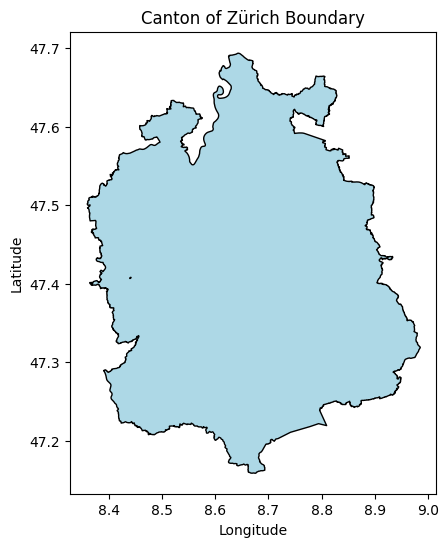

In [3]:
# Quick visualization
gdf.plot(edgecolor="black", facecolor="lightblue", figsize=(6,6))
plt.title("Canton of Zürich Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

---

## 2. Evaluate point with a geographical query

### 2.1. Checking if a Point is Within the Canton of Zürich

This script demonstrates how to verify whether a user-input geographical point falls within the **Canton of Zürich** using **GeoPandas** and **Shapely**. The script first loads a **GeoJSON file** containing Zürich's boundary and ensures it is in the correct **WGS84 coordinate system (`EPSG:4326`)**. It then prompts the user to input latitude and longitude values. These coordinates are converted into a **Shapely Point object**, which is checked against the Zürich boundary using **spatial containment analysis** (`.contains()`). 

If the point is inside the canton, the script prints a confirmation message and **plots the Zürich boundary along with the user's point**. The **canton outline is displayed in light blue**, and the user’s location appears as a **red marker**. If the point is outside the boundary, a message stating `"❌ Invalid location!"` is displayed without generating a plot.

**Sample coordinates**:

| Status  | Latitude  | Longitude |
|---------|----------|-----------|
| Within the boundaries   | 47.3769  | 8.5417    |
| Outside of the boundaries | 46.2044  | 6.1432    |

Enter latitude:  47.3769
Enter longitude:  8.5417


✅ The point is within the Canton of Zürich


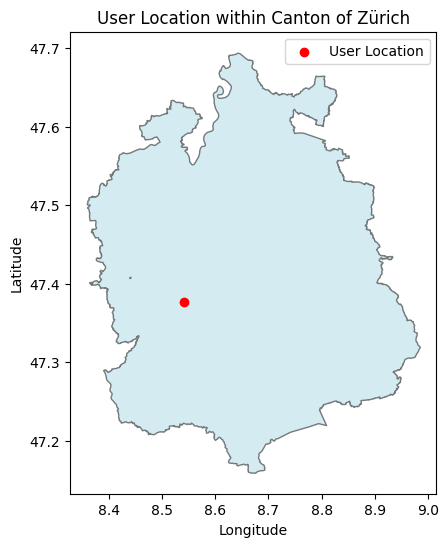

In [4]:
# Load the Zürich boundary GeoJSON
boundary_gdf = gpd.read_file("data/raw/zh_boundary.geojson")

# Ensure it's in the correct CRS (WGS 84 - EPSG:4326)
boundary_gdf = boundary_gdf.to_crs("EPSG:4326")

# Get user input coordinates
lat = float(input("Enter latitude: "))
lon = float(input("Enter longitude: "))

# Create a point from user input
user_point = Point(lon, lat)

# Check if the point is inside the Zürich boundary
if boundary_gdf.contains(user_point).any():
    print("✅ The point is within the Canton of Zürich")

    # Plot Zürich boundary and the user point
    fig, ax = plt.subplots(figsize=(6, 6))
    boundary_gdf.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.5)
    ax.scatter(lon, lat, color="red", marker="o", label="User Location", zorder=3)
    
    # Labels and formatting
    plt.title("User Location within Canton of Zürich")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()
else:
    print("❌ Invalid location!")

### 2.2. Checking if a Point is Within the Canton of Zürich with Coordinate Conversion

The following revised version introduces **coordinate system conversion** to improve spatial accuracy in Swiss mapping, and also provide compatibility with the other datasets that are handled in the project. While the user still enters latitude and longitude in the **WGS84 system (`EPSG:4326`)**, the script now **converts both the Zürich boundary and the input coordinates to the Swiss LV95 system (`EPSG:2056`)** before performing the spatial query. This ensures **higher precision** when checking if the point is inside the canton.

After the containment check, the script **transforms the data back to WGS84 (`EPSG:4326`)** for visualization. This update ensures that **all spatial operations occur in the appropriate Swiss coordinate system (LV95)** while still allowing users to interact with the script using standard latitude/longitude inputs. The resulting map remains the same but now benefits from a more **accurate and GIS-standardized approach**.

**Sample coordinates**:

| Status  | Latitude  | Longitude |
|---------|----------|-----------|
| Within the boundaries   | 47.3769  | 8.5417    |
| Outside of the boundaries | 46.2044  | 6.1432    |

In [ ]:
# Load the Zürich boundary GeoJSON
boundary_gdf = gpd.read_file("data/raw/zh_boundary.geojson")

# Convert Zürich boundary to LV95 (Swiss Coordinate System)
boundary_gdf = boundary_gdf.to_crs("EPSG:2056")

# Get user input coordinates in WGS84
lat = float(input("Enter latitude (WGS84): "))
lon = float(input("Enter longitude (WGS84): "))

# Convert user coordinates from WGS84 to LV95
wgs84_to_lv95 = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:2056", always_xy=True)
lv95_x, lv95_y = wgs84_to_lv95.transform(lon, lat)

# Create a point in LV95
user_point_lv95 = Point(lv95_x, lv95_y)

# Check if the LV95 point is inside the Zürich boundary
if boundary_gdf.contains(user_point_lv95).any():
    print("✅ The point is within the Canton of Zürich")

    # Convert the Zürich boundary back to WGS84 for plotting
    boundary_gdf = boundary_gdf.to_crs("EPSG:4326")

    # Convert LV95 point back to WGS84 for plotting
    lv95_to_wgs84 = pyproj.Transformer.from_crs("EPSG:2056", "EPSG:4326", always_xy=True)
    lon_wgs84, lat_wgs84 = lv95_to_wgs84.transform(lv95_x, lv95_y)

    # Plot Zürich boundary and the user point
    fig, ax = plt.subplots(figsize=(6, 6))
    boundary_gdf.plot(ax=ax, edgecolor="black", facecolor="lightblue", alpha=0.5)
    ax.scatter(lon_wgs84, lat_wgs84, color="red", marker="o", label="User Location", zorder=3)

    # Labels and formatting
    plt.title("User Location within Canton of Zürich")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()
else:
    print("❌ Invalid location!")